# Group 18 Proposal - PROJECT NAME



Dataset Link : https://archive.ics.uci.edu/ml/datasets/Student+Performance

### Introduction:
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

### Prelimnary Exploratory data analysis:

In [88]:
# RUN THIS FIRST
install.packages('patchwork')
library(tidyverse)
library(repr)
library(tidymodels)
library(patchwork)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Reading The Data From the Web:

In [90]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip",temp)
grades <- read_csv2(unz(temp, "student-mat.csv"))
unlink(temp)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



In [91]:
head(grades,n=3)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10


#### Cleaning and Wrangling Data:
(I'm not sure if we need to explain each step) \
The data only included the final scores of the students, we have categorized them in the ```passed``` vector which indicates if the student passed the course. Additionally weekday alcohol consumption (Dalc) and weekend alcohol consumption (Walc) were averaged in vector ```avg_alc```. For the purpose of answering our predictive question, ```absences```, ```passed```, ```avg_alc``` are the only varibles required so the columns have been reduced to that subset

In [97]:
grades_wrangled <- grades %>%
    mutate(passed = G3 >= 10, avg_alc = (Dalc+Walc)/2) %>%
    select(absences,passed,avg_alc)
head(grades_wrangled,n=3)

absences,passed,avg_alc
<dbl>,<lgl>,<dbl>
6,FALSE,1.0
4,FALSE,1.0
10,TRUE,2.5


#### Tabular Exploratory Data Analysis:

In [99]:
count_passed <- grades_wrangled %>%
    group_by(passed) %>%
    summarize(count = n(),avg_alc = mean(avg_alc), avg_absences = mean(absences))
count_passed

`summarise()` ungrouping output (override with `.groups` argument)



passed,count,avg_alc,avg_absences
<lgl>,<int>,<dbl>,<dbl>
FALSE,130,1.950000,6.761538
TRUE,265,1.854717,5.192453


#### Visual Exploratory Data Analysis:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



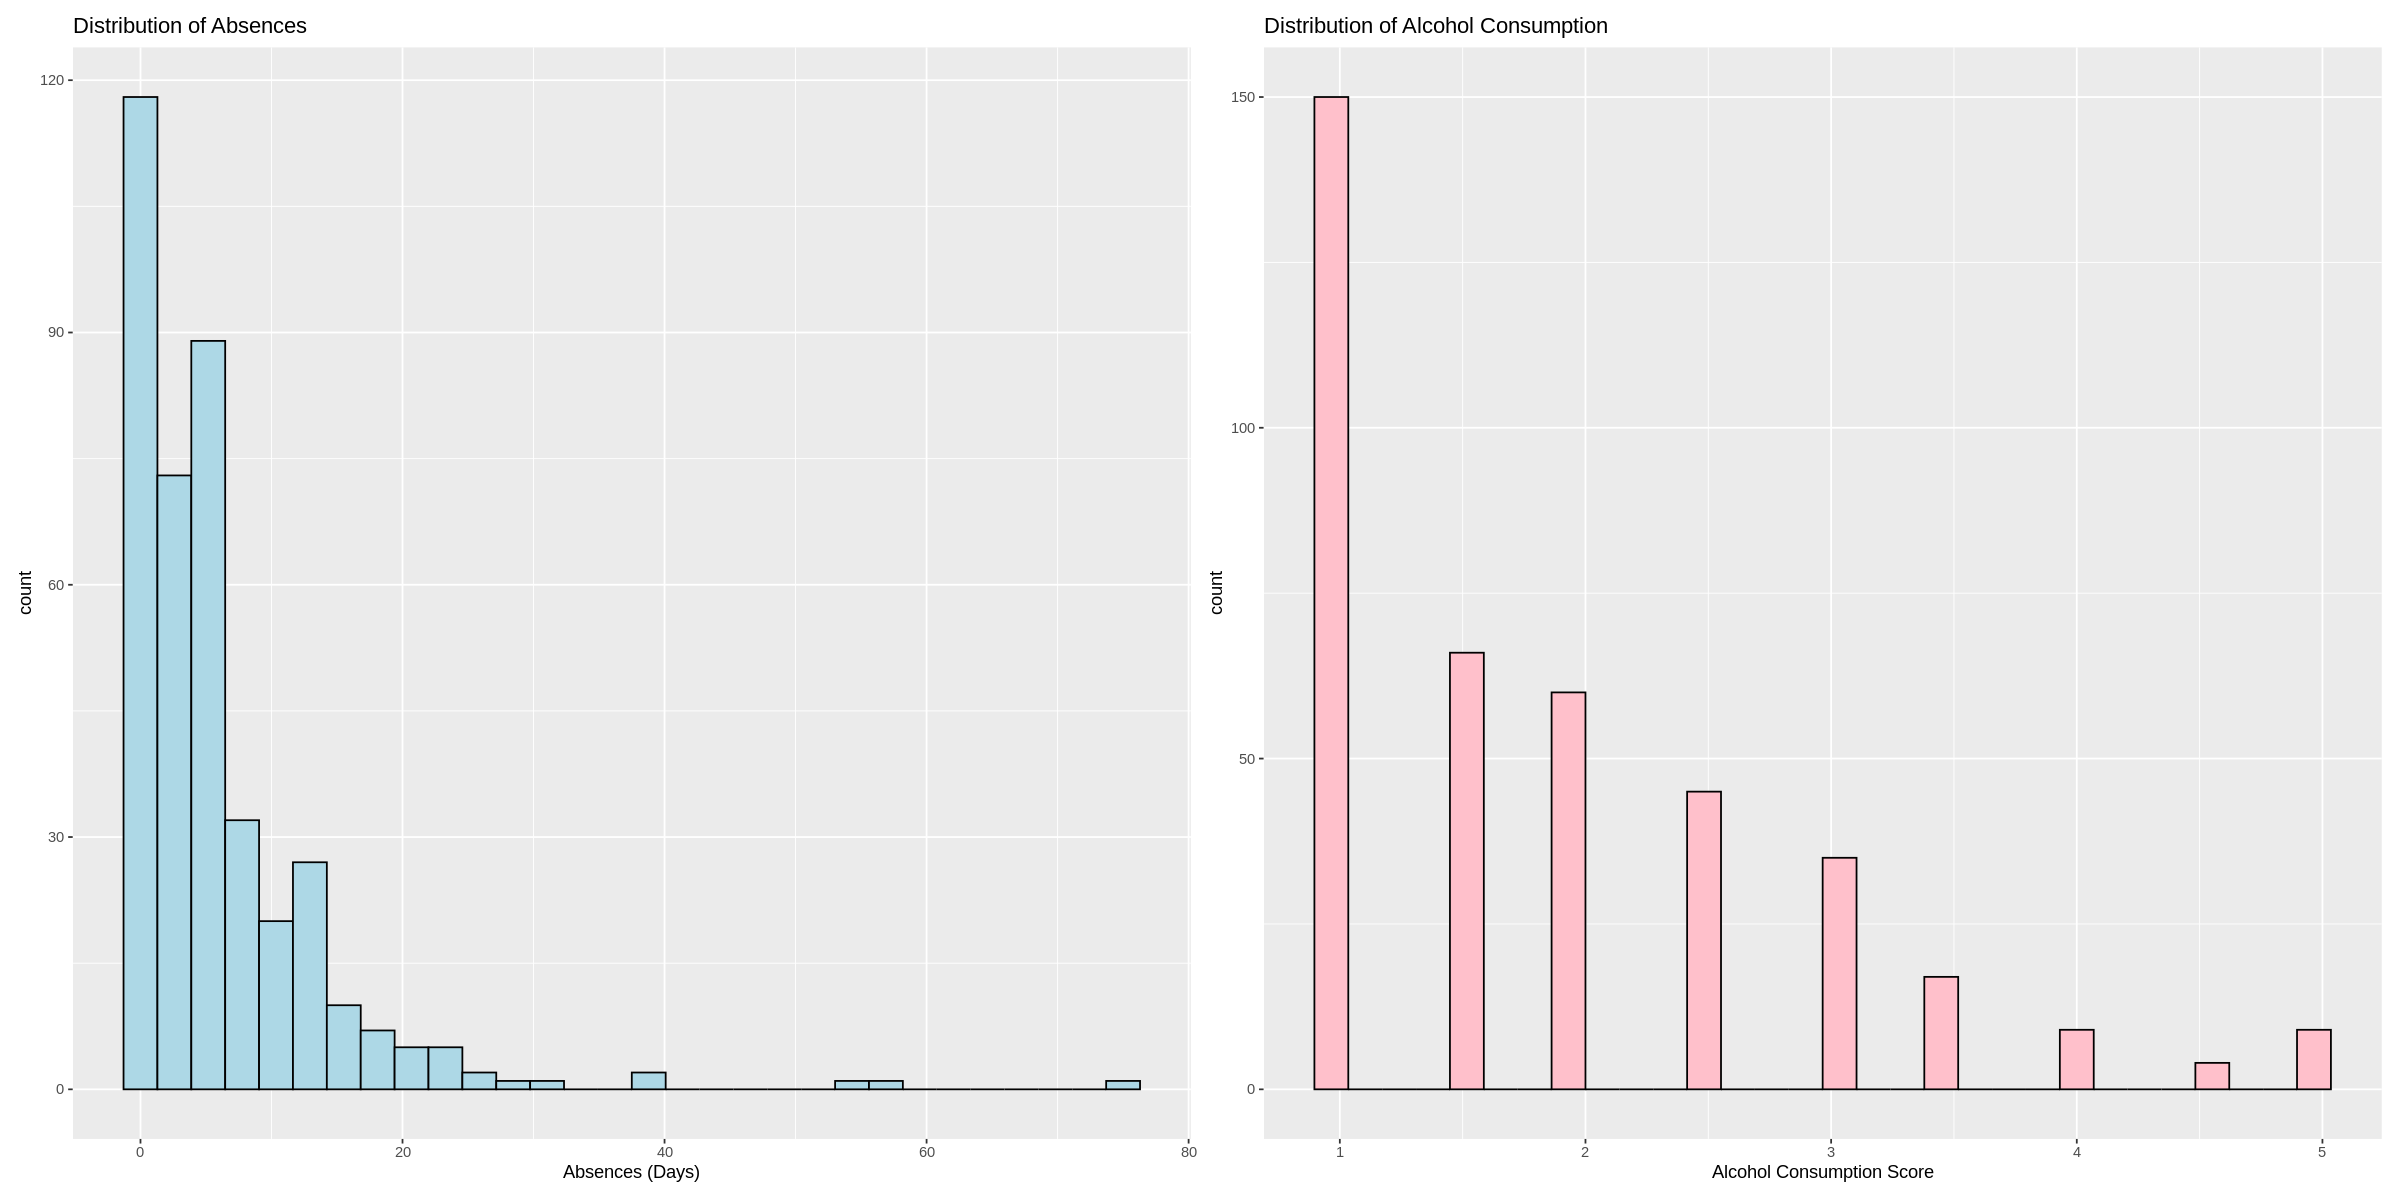

In [101]:
options(repr.plot.width = 20, repr.plot.height = 10)

absence_plot <- grades_wrangled %>%
    ggplot(aes(x=absences)) +
    geom_histogram(color='black',fill='light blue') +
    labs(x='Absences (Days)') +
    ggtitle('Distribution of Absences')
alc_plot <- grades_wrangled %>%
    ggplot(aes(x=avg_alc)) +
    geom_histogram(color='black',fill='pink') +
    labs(x='Alcohol Consumption Score') + 
    ggtitle('Distribution of Alcohol Consumption')
absence_plot + alc_plot

### Methods:
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

### Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to? 

### Citations:
